# Project 2
## B-IT Pattern Recognition



Presented on 07-Jan-2016 by:

- Abdullah Abdullah

- Can Güney Aksakallı

- Kang Cifong

- Umut Hatipoğlu

***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pattrex.plotting_mpl as plt_rex
import pattrex.preprocessing as pre_rex
import pattrex.fitting as fit_rex

from pattrex.demo_helper import read_whdata

In [2]:
# Read data
ws, hs, gs = read_whdata()
HW = np.vstack((hs, ws)).astype(np.float)

# removing outliers
HW_new, neg_idx = pre_rex.only_all_positive(HW, True, return_neg_idx=True)

# unknown
hu = np.array([h for i, h in enumerate(hs) if i in neg_idx])

hn = HW_new[0, :]
wn = HW_new[1, :]

In [3]:
qx = np.random.uniform(3, 5, 60)
qx = np.hstack((qx, np.random.uniform(-5, -0.5, 40)))
qy = np.abs(qx) + np.random.uniform(0, 1.0, 100)
qx = np.hstack((qx, np.array([1, 2, 3, 5, 12])))
qy = np.hstack((qy, np.array([11, 3.5, 2.0, 10, 21])))

qu = np.array([1.1, 2.2, -3.3, -1.1])

## Task 2.1
### Ordinary Least Squares Regression

- We are assuming that Weight is a function of Height

- We are assuming that the function is an nth degree polynomial

- We use `numpy.linalg.lstsq(...)` to do the job for us
    
    + If doing *manually*, one can use `numpy.linalg.pinv(...)` to calculate the Moore-Penrose pseudo-inverse

In [4]:
def demo_1(x, y, u, degrees, padding=50):
    
    # fit polynomial of degrees 1...10
    results = []
    for degree in range(1, max(degrees)+1):
        results.append(
            fit_rex.fit_polynomial_nplstsq(x, y, degree
                                           , x_pad=padding
                                           , X_unknown=u))
        
    # # pretty print and plot results for [1, 5, 10] ###########
    coeffs = []
    coeffs_string = "{}: "
    
    preds = []
    preds_string = "{}: "
    
    fig = plt.figure(figsize=(12, 8))
    axs = fig.add_subplot(111)
    
    XY_ = np.vstack((x, y))
    xmin, ymin = XY_.min(axis=1)
    xmax, ymax = XY_.max(axis=1)

    xlim = [xmin-padding, xmax+padding]
    ylim = [ymin-padding, ymax+padding]

    # plot data
    plt_rex.plot2d(XY_, colwise_data=True, 
                   hatch='o', color='lavender',
                   x_lim=xlim, y_lim=ylim, 
                   show=False, axs=axs, plotlabel="data")

    # plot unkown vertical lines
    for h in u:
        axs.axvline(x=h, color='thistle')
        
    for degree in degrees:
        res = results[degree-1]
        
        coeffs.append(res[0])
        
        preds.append(res[2][1])
        preds_string += "{:4.3} |"
        
        line = res[1]
        pred = res[2]
        
        plt_rex.plot2d(np.vstack(line), colwise_data=True,
                      hatch='-',
                      show=False, axs=axs,
                      plotlabel=str(degree))
        plt_rex.plot2d(np.vstack(pred), colwise_data=True,
                      hatch='o',
                      show=False, axs=axs,
                      plotlabel=str(degree)+" pred")
        
    print("Coefficients")
    print("\n\n".join("{}".format(c) for c in coeffs))
    print()
    print("Predictions " + str(degrees))
    print("\n".join(preds_string.format(*p) for p in zip(u, *preds)))

Coefficients
[-209.32503027    1.61805916]

[ -2.42736271e+02   2.00365675e+00  -1.11060527e-03]

[  1.45372950e+02   5.00648642e+03  -1.15279840e+02   9.94128981e-01
  -3.80603682e-03   5.45891635e-06]

[  1.30258110e-06   9.54928046e-05   5.52169250e-03   1.90340817e-01
  -4.38414360e-03   3.78208524e-05  -1.44853576e-07   2.07836521e-10]

[  3.39741629e-19   1.17900058e-11  -9.63490518e-15   2.89518900e-13
   2.13966507e-11   1.23047796e-09   4.24710787e-08  -9.78013259e-10
   8.43625378e-12  -3.23109114e-14   4.63624155e-17]

Predictions [1, 2, 5, 7, 10]
168.0: 62.5 |62.5 |58.8 |58.4 |58.0 |
172.0: 69.0 |69.0 |69.7 |69.5 |69.5 |
167.0: 60.9 |60.9 |56.1 |55.7 |55.5 |


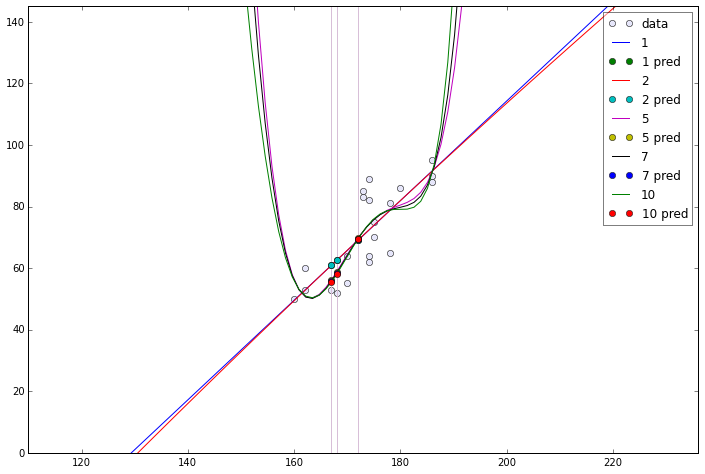

In [5]:
demo_1(hn, wn, hu, [1, 2, 5, 7, 10])

### for some noisy data for $y=mod(x)$

Coefficients
[ 3.98883539  0.2570583 ]

[ 2.38148394  0.02900984  0.12893678]

[  2.50097037e+00   1.25870937e-01   9.68798777e-02  -4.17902406e-03
   1.50335311e-03  -8.39578533e-05]

[  3.49934104e+00   1.30593611e+00   2.62863513e-02  -1.80782877e-01
   1.76791174e-03   6.43107736e-03   4.03532145e-05  -4.03824219e-05]

[  5.88327380e+00   4.58968435e+00  -1.02309746e+00  -1.50081465e+00
   1.80503003e-01   1.69989870e-01  -1.57033297e-02  -7.98970666e-03
   6.80065409e-04   1.32997349e-04  -1.11248004e-05]

Predictions [1, 2, 5, 7, 10]
1.1: 4.27 |2.57 |2.75 |4.74 |8.19 |
2.2: 4.55 |3.07 |3.23 |4.94 |4.77 |
-3.3: 3.14 |3.69 | 3.5 |3.89 |3.87 |
-1.1: 3.71 |2.51 |2.49 |2.33 |1.57 |


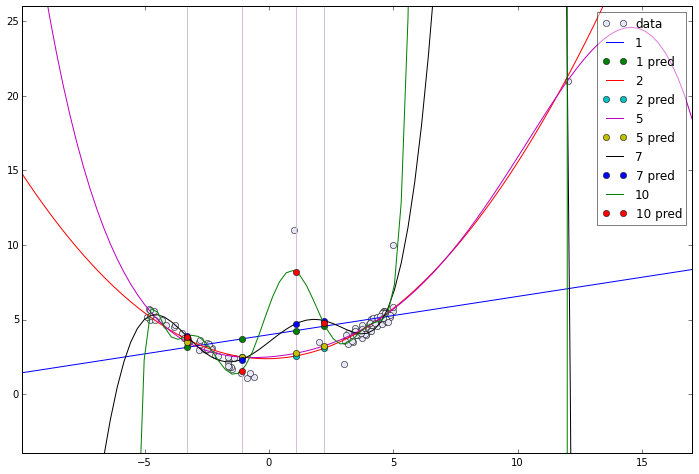

In [6]:
demo_1(qx, qy, qu, [1, 2, 5, 7, 10], padding=5)

More, later with Task 2.3

## Task 2.2
### Conditional Expectation from a Bivariate Gaussain

- We used the equations from the slides for fitting a Bivariate Gaussian

$$
\begin{align*}
\mathbf{E} \left[w \mid h = h_0 \right] &= 
\int w 
\mathcal{N} \left(w \mid \mu_{w \mid h=h_0}, \sigma^2_{w \mid h=h_0} \right) dw \\
&= \mu_{w \mid h=h_0}
\end{align*}
$$

    where

$$
\begin{align*}
\mu_{w \mid h=h_0} &= \mu_{w} + \rho \frac{\sigma_w}{\sigma_h}(h_0 - \mu_h) \\
\sigma^2_{w \mid h=h_0} &= \sigma^2_w (1-\rho^2) \\
\rho &= \frac{cov(h, w)}{\sigma_h \sigma_w}
\end{align*}
$$

- We used `numpy.cov(...)` to calculate the covariance 
    
    + by default, the normalization is by `N-1`.
    
    + for MLE estimate, use `ddof=0`
    
    + we used the default, but standard-deviation is still biased

- for the correlation coefficient $\rho$, one can also use `numpy.corrcoef(...)`


In [7]:
def demo_2(x, y, u, ddof=None, padding=50):
    XY = np.vstack((x, y))
    res = fit_rex.fit_multivariate_normal_dist(XY, ddof=ddof
                                               , padding=padding
                                               , get_pdf=True
                                               , X_unknown=u
                                               , X_unknown_dim=0)
    coeff = res[0]
    line = res[1]
    pred = res[2]
    xypdf = res[3]
    
    preds = []
    preds_string = "{}: "

    preds.append(pred[1])
    preds_string += "{:4.3} |"
    
    fig = plt.figure(figsize=(12, 8))
    axs = fig.add_subplot(111)
    
    xmin, ymin = XY.min(axis=1)
    xmax, ymax = XY.max(axis=1)

    xlim = [xmin-padding, xmax+padding]
    ylim = [ymin-padding, ymax+padding]

    # plot data
    plt_rex.plot2d(XY, colwise_data=True, 
                   hatch='o', color='lavender',
                   x_lim=xlim, y_lim=ylim, 
                   show=False, axs=axs, plotlabel="data")

    # plot unkown vertical lines
    for h in u:
        axs.axvline(x=h, color='thistle')

    plt_rex.plot2d(np.vstack(line), colwise_data=True,
                  hatch='-',
                  show=False, axs=axs,
                  plotlabel="cond_exp")
    
    plt_rex.plot2d(np.vstack(pred), colwise_data=True,
                  hatch='o',
                  show=False, axs=axs,
                  plotlabel="pred")
        
    axs.contour(*xypdf)

    print("Coefficients")
    print("\n".join("{} {}".format(*c) for c 
                    in zip(["mean\n", "covariance\n", "corr\n"], coeff)))
    print()
    print("Predictions")
    print("\n".join(preds_string.format(*p) for p in zip(u, *preds)))

    

Coefficients
mean
 [ 173.57142857   71.52380952]
covariance
 [[  55.05714286   89.08571429]
 [  89.08571429  219.46190476]]
corr
 0.8104414767618634

Predictions
168.0: 62.5 |
172.0: 69.0 |
167.0: 60.9 |


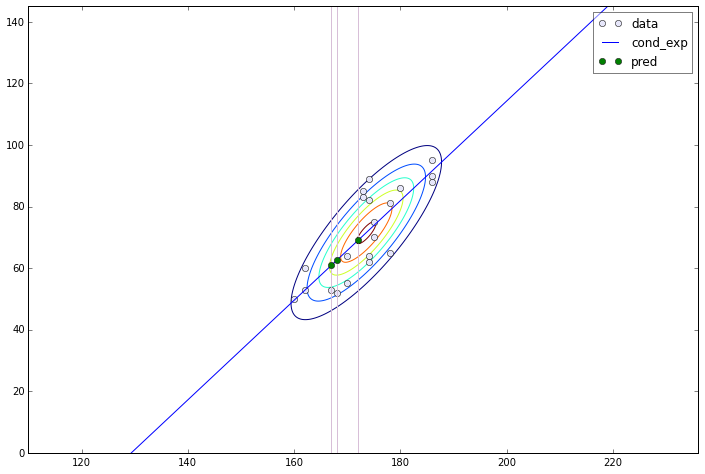

In [8]:
demo_2(hn, wn, hu)

- As expected, the conditional expectation gives a straight line through the mean

- **But**, why is it not cutting through the center evenly?
    
    + is it because of the *still* biased standard deviations?

### for some noisy data for $y=mod(x)$

Coefficients
mean
 [ 1.46809375  4.36622107]
covariance
 [[ 13.03160375   3.34988186]
 [  3.34988186   4.73164583]]
corr
 0.4266035283420823

Predictions
1.1: 4.27 |
2.2: 4.55 |
-3.3: 3.14 |
-1.1: 3.71 |


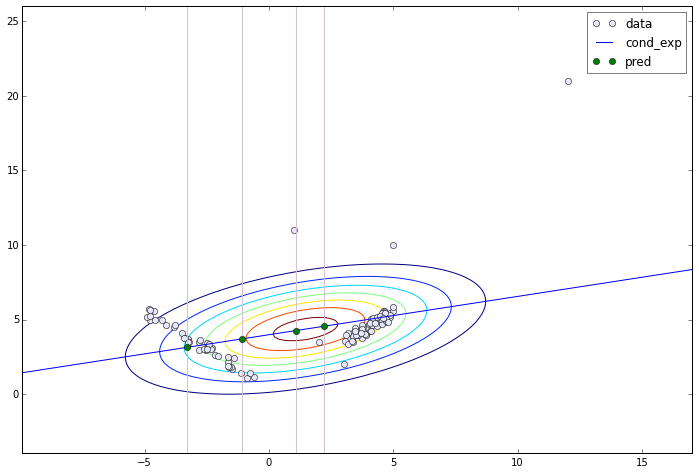

In [9]:
demo_2(qx, qy, qu, padding=5)

## Task 2.3
### Bayesian Parameter Estimation

- We tried two methods, using equations from the lecture slides

    1. Find the Maximum A Posteriori Estimate of the coefficients, and use the dot product
    2. Use the expectation of the conditional probability of the weights

### $\mathbf{w}_{MAP}$ as Regularized Least Squares

We used the equation:
$$
\begin{align*}
\mathbf{w}_{MAP} &= {argmax}_{\mathbf{w}} \, p(\mathbf{w} \mid D) \\
&= \left(\mathbf{X}^T \mathbf{X} + \frac{\sigma^2}{{\sigma_{0}}^2} \mathbf{I} \right) ^{-1} \, \mathbf{X}^T \mathbf{y}
\end{align*}
$$


Which is a case of ***Regularized Least Squares***

- We used `scipy.sparse.linalg.lsmr(...)` for this

    + It is not exactly needed, since the dataset is so small
    


- $\sigma_{0}^2 = 3$ was given

- we chose $\sigma^2 = var(\mathbf{y})$

    + similar to how `sklearn.linear_model.BayesianRidge()` does
    
    + also because this variance will be *corrected* while calculating the parameters for the conditional probability of the weights

### Expectation of the conditional probability

Assuming that the observed weights are normally distributed about the polynomial :
$$
y(x) = \sum^{d}_{j=0} w_j x^j
$$


we used the equations from the slides:
$$
\mathbb{E}[y \mid x=x_0 , D] = \mathbf{\mu}^T \mathbf{x_0}
$$


where 
$$
\begin{align*}
\mu &= \frac{1}{\sigma^2} \mathbf{\Lambda}^{-1} \mathbf{X}^T \mathbf{y} \\
\mathbf{\Lambda} &= \frac{1}{\sigma^2} \mathbf{X}^T \mathbf{X} + \frac{1}{{\sigma_0}^2} \mathbf{I}
\end{align*}
$$

#### Comparing results for degree = 5

In [10]:
def demo_3(x, y, u, degree, padding=50):
    XY = np.vstack((x, y))
    
    res_man_lsmr = \
        fit_rex.fit_polynomial_bayesian(x, y, degree
                                       , sig2=None, sig2_0=3.0
                                       , use_lsmr=True, use_pinv=False
                                       , padding=padding, get_pdf=False
                                       , X_unknown=u)
        
    res_man_pinv = \
        fit_rex.fit_polynomial_bayesian(x, y, degree
                                       , sig2=None, sig2_0=3.0
                                       , use_lsmr=True, use_pinv=True
                                       , padding=padding, get_pdf=False
                                       , X_unknown=u)
        
    res_skl = \
        fit_rex.fit_polynomial_bayesian_skl(x, y, degree
                                           , padding=padding
                                           , X_unknown=u)
        
    res_lstsq = \
        fit_rex.fit_polynomial_nplstsq(x, y, degree
                                      , x_pad=padding
                                      , X_unknown=u)
        
    res_multi_gauss = \
        fit_rex.fit_multivariate_normal_dist(XY, ddof=None
                                             , padding=padding
                                             , get_pdf=False
                                             , X_unknown=u
                                             , X_unknown_dim=0)
        
    labels = [
        "dot_coeff"
        , "cond_exp_inv"
        , "cond_exp_pinv"
        , "sklearn"
        , "lstsq"
        , "multi_gauss"
    ]
    
    coeffs = [
        res_man_lsmr[0]
        , res_skl[0]
        , res_lstsq[0]
    ]
    
    lines = [
        res_man_lsmr[1][1]
        , res_man_lsmr[1][0]
        , res_man_pinv[1][0]
        , res_skl[1][0]
        , res_lstsq[1]
        , res_multi_gauss[1]
    ]
    
    preds = [
        res_man_lsmr[2][1]
        , res_man_lsmr[2][0]
        , res_man_pinv[2][0]
        , res_skl[2][0]
        , res_lstsq[2]
        , res_multi_gauss[2]
    ]
    
    predsw = [
        res_man_lsmr[2][1][1]
        , res_man_lsmr[2][0][1]
        , res_man_pinv[2][0][1]
        , res_skl[2][0][1]
        , res_lstsq[2][1]
        , res_multi_gauss[2][1]
    ]
    
    fig = plt.figure(figsize=(12, 8))
    axs = fig.add_subplot(111)
    
    xmin, ymin = XY.min(axis=1)
    xmax, ymax = XY.max(axis=1)

    xlim = [xmin-padding, xmax+padding]
    ylim = [ymin-padding, ymax+padding]
    
    # plot data
    plt_rex.plot2d(XY, colwise_data=True, 
                   hatch='o', color='lavender',
                   x_lim=xlim, y_lim=ylim, 
                   show=False, axs=axs, plotlabel="data")

    # plot unkown vertical lines
    for h in u:
        axs.axvline(x=h, color='thistle')
        
    colors = ['r', 'g', 'b', 'k', 'm', 'y']
    for label, line, pred, c in zip(labels, lines, preds, colors):
        plt_rex.plot2d(np.vstack(line), colwise_data=True,
                      hatch=c+'-',
                      show=False, axs=axs,
                      plotlabel=label)
        plt_rex.plot2d(np.vstack(pred), colwise_data=True,
                      hatch=c+'o',
                      show=False, axs=axs,
                      plotlabel=label+" preds")
        
    
    coeff_string = "{}: " + "".join("{:5.5} |" 
                                    for ci in range(len(coeffs)))
    preds_string = "{}: " + "".join("{:4.3} |" 
                                    for pi in range(len(predsw)))
    
    print("\n### DEGREE = {} ###############"\
          "###################\n".format(degree))
    print("Coefficients\n" + 
          str(["Bayesian inv", "sklearn", "lstsq"]))
    print("\n".join(coeff_string.format(i, *c) 
                    for i, c in enumerate(zip(*coeffs))))
    print()
    print("Predictions\n" + str(labels))
    print("\n".join(preds_string.format(*p) for p in zip(u, *predsw)))


### DEGREE = 5 ##################################

Coefficients
['Bayesian inv', 'sklearn', 'lstsq']
0: 4.5666e-16 |15.974 |145.37 |
1: 6.4147e-14 |-8.584e-09 |5006.5 |
2: 8.4604e-12 |-1.4678e-06 |-115.28 |
3: 9.9334e-10 |-0.00012551 |0.99413 |
4: 8.7598e-08 |1.4368e-06 |-0.003806 |
5: -5.4888e-11 |-3.7582e-09 |5.4589e-06 |

Predictions
['dot_coeff', 'cond_exp_inv', 'cond_exp_pinv', 'sklearn', 'lstsq', 'multi_gauss']
168.0: 62.4 |61.3 |62.4 |62.4 |58.8 |62.5 |
172.0: 68.4 |68.6 |69.1 |69.0 |69.7 |69.0 |
167.0: 61.0 |59.6 |60.8 |60.8 |56.1 |60.9 |


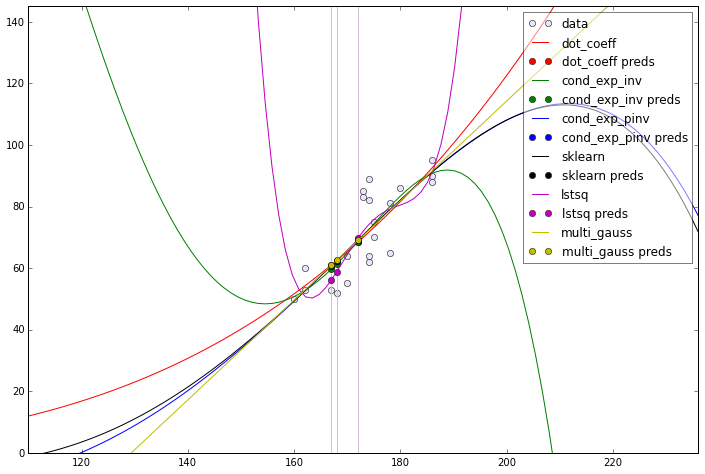

In [11]:
demo_3(hn, wn, hu, 5)

### for some noisy data for $y=mod(x)$


### DEGREE = 5 ##################################

Coefficients
['Bayesian inv', 'sklearn', 'lstsq']
0: 0.95105 |2.9646 |2.501 |
1: 0.073084 |0.0010182 |0.12587 |
2: 0.33996 |0.0015925 |0.09688 |
3: -0.014288 |0.0085208 |-0.004179 |
4: -0.0064169 |0.004991 |0.0015034 |
5: 0.00051433 |-0.00040345 |-8.3958e-05 |

Predictions
['dot_coeff', 'cond_exp_inv', 'cond_exp_pinv', 'sklearn', 'lstsq', 'multi_gauss']
1.1: 1.42 |2.39 |2.39 |2.99 |2.75 |4.27 |
2.2: 2.48 |3.02 |3.02 |3.16 |3.23 |4.55 |
-3.3: 3.96 |3.63 |3.63 |3.42 | 3.5 |3.14 |
-1.1: 1.29 |2.19 |2.19 |2.96 |2.49 |3.71 |


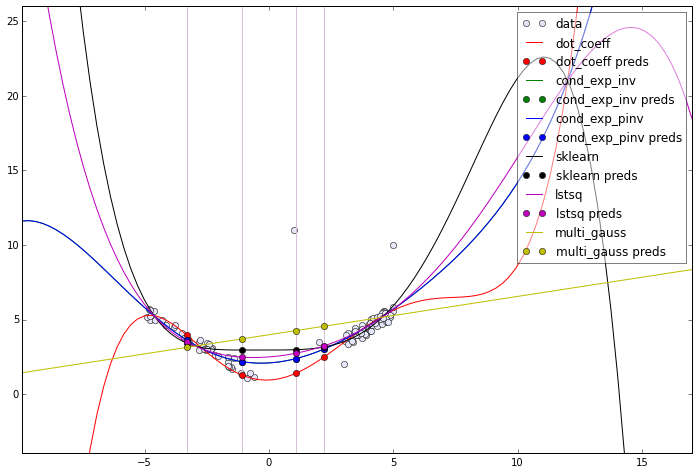

In [12]:
demo_3(qx, qy, qu, 5, padding=5)


### DEGREE = 2 ##################################

Coefficients
['Bayesian inv', 'sklearn', 'lstsq']
0: 2.2713 |2.3915 |2.3815 |
1: 0.028058 |0.027572 |0.02901 |
2: 0.13284 |0.12841 |0.12894 |

Predictions
['dot_coeff', 'cond_exp_inv', 'cond_exp_pinv', 'sklearn', 'lstsq', 'multi_gauss']
1.1: 2.46 | 2.5 | 2.5 |2.58 |2.57 |4.27 |
2.2: 2.98 |3.01 |3.01 |3.07 |3.07 |4.55 |
-3.3: 3.63 |3.65 |3.65 | 3.7 |3.69 |3.14 |
-1.1:  2.4 |2.44 |2.44 |2.52 |2.51 |3.71 |


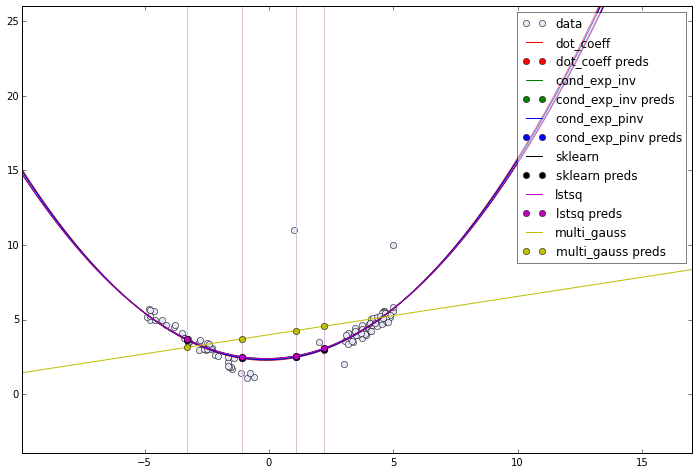

In [13]:
demo_3(qx, qy, qu, 2, padding=5)

### Comparing the approaches

- **Ordinary Least Squares**

    + has tendency to overfit with complexity of model
    
    
- **conditional expectation of Bivariate Gaussian**

    + Assumes the parameters of the model are fixed, and the samples represent them
    
    + worked fine for `whData.dat` (maybe), but is not a right model for ***every*** problem

### Comparing the approaches

- $w_{MAP}$
    
    + This is regularized least squares 
    
    + still has tendency to overfit the observations when complexity of the model is increased
    
        * even though it worked quite fine for `whData.dat` (maybe)
        
- **Bayesian Regression**

    + using `numpy.linalg.inv(...)` or `numpy.linalg.pinv(...)` for $\Lambda^{-1}$ may or may not coincide with the the results of `sklearn`
    
        * `sklearn` assumes the priors for $\sigma^2$ and ${\sigma_0}^2$ to be gamma distributions
        
        * `sklearn` results cannot be assumed to be correct, if our model is wrong
        
    + which one is correct?
    
    
$$ \mu = \frac{1}{\sigma^2} \mathbf{\Lambda}^{-1} \mathbf{X}^T \mathbf{y}$$

## Task 2.4
### Nearest Neighbor Classifier